In [1]:
import igraph as ig
import numpy as np
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix


read_dictionary = np.load('visualize.npy', allow_pickle='TRUE').item()

tag_to_number_map = {}
i = 0
for key, value in read_dictionary.items():
    if(value > 1):
        tag_to_number_map[key.strip()] = i
        i += 1

filename = 'article-ids.txt'
ids = []
tags2D = []
flat_tags = []
with open(filename, 'r') as f:
    ids = f.readlines()
    
for id in ids:
    filename = f'tags-{id.strip()}.txt'
    with open(filename, 'r') as f:
        all_tags = f.readlines()
        all_tags = list(map(str.strip, all_tags))
        valid_tags = [value for value in all_tags if value in tag_to_number_map.keys()]
        tags2D.append(list(map(str.strip, valid_tags)))

flat_tags = [item for sublist in tags2D for item in sublist]

    
matrix = csr_matrix((len(flat_tags), len(ids)), dtype=np.int8).toarray()
for i in range(len(flat_tags)):
    for j in range(len(ids)):
        if(flat_tags[i] in tags2D[j]):
            matrix[i][j] += 1

adj = np.matmul(matrix, matrix.T)
    
g = ig.Graph.Weighted_Adjacency(adj, mode="undirected", loops=False)

            

In [2]:
weights = [item for sublist in adj for item in sublist]

g.es["label"] = weights
g.es["weight"] = weights

g.es.select(weight=0).delete()
g.vs.select(_degree = 0).delete()

g_deg = g.degree()
g_deg = list(map(lambda num:num*10, g_deg))


{'نظریه بازیها': 0, 'پایداری': 1, 'اثربخشی': 2, 'الگوی مصرف': 3, 'تزریق گاز': 4, 'تجزیه و تحلیل مناقشات': 5, 'زنجیره تأمین': 6, 'نظریه بازی ها': 7, 'انرژی': 8, 'نظریه بازی': 9, 'مناقشه': 10, 'استراتژی جایگزین': 11, 'اطلاعات': 12, 'مدل کارنو': 13, 'قابلیت اطمینان': 14, 'رفتارسنجی هیدرولوژیک': 15, 'مشارکت مردمی': 16, 'فرایند تولید': 17, 'شبیه سازی': 18, 'مدیریت منابع آب': 19, 'اثر شلاقی': 20, 'تحلیل حساسیت': 21, 'ارزیابی عملکرد': 22, 'کارت امتیازی متوازن': 23, 'ارزش بازاری': 24, 'ارزش ذاتی': 25, 'زنجیره تامین': 26, 'هماهنگی': 27, 'قیمت گذاری': 28, 'تعادل نش': 29, 'ترجیحات چهار سطحی': 30, 'افزایش-1': 31, '2': 32, 'رقابت': 33}


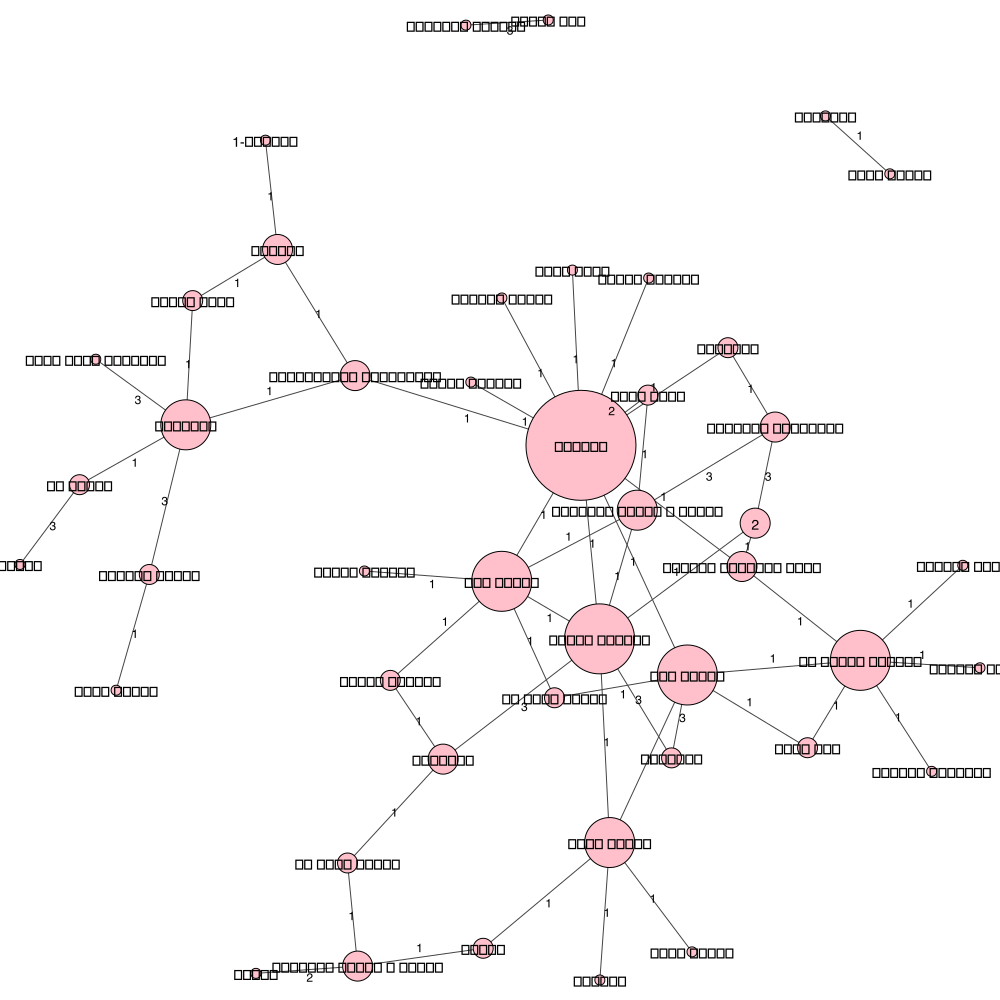

In [3]:
print(tag_to_number_map)
layout = g.layout('kk')
visual_style = {}
visual_style["vertex_size"]= g_deg
visual_style["vertex_color"] = ['pink' for v in g.vs]
visual_style["vertex_label"] = [get_display(reshape(tag))
                for tag in list(tag_to_number_map.keys())]
ig.plot(g, **visual_style, bbox = (1000,1000), target='myfile.pdf')

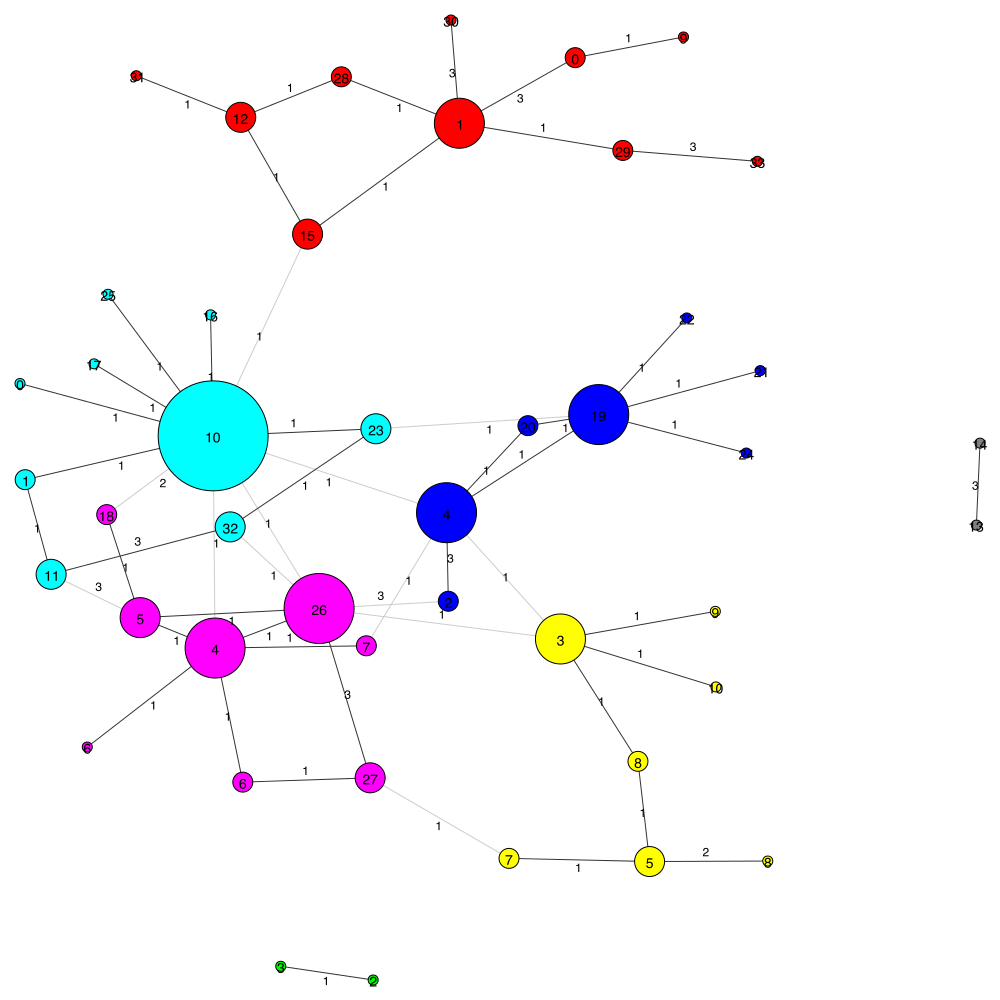

In [4]:
multilevel_community = g.community_multilevel()
visual_style = {}
visual_style["vertex_size"]= g_deg
visual_style["vertex_label"] = list(tag_to_number_map.values())
ig.plot(multilevel_community, **visual_style, bbox = (1000,1000),target='myfile2.pdf')

In [5]:
propagation_community = g.community_label_propagation()

In [2]:
visual_style = {}
visual_style["vertex_size"]= g_deg
visual_style["vertex_label"] = list(tag_to_number_map.values())
ig.plot(propagation_community, **visual_style, bbox = (1000,1000),target='myfile3.pdf')

NameError: name 'g_deg' is not defined

In [7]:
print(ig.compare_communities(multilevel_community, propagation_community, method='vi', remove_none=False))

0.9117727235370201


In [8]:
print(g.modularity(multilevel_community, weights=None))
print(g.modularity(propagation_community, weights=None))

0.5733418367346939
0.5184948979591837
